<a href="https://colab.research.google.com/github/anniedcruz/PDTA/blob/main/PDTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3 : PREDICTION USING DECISION TREE ALGORITHM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

LOADING DATASET

In [ ]:
#Loading the iris dataset from provided source
iris_df = pd.read_csv("Iris.csv", index_col=False)
iris_df = iris_df[iris_df.columns[1:]]

In [ ]:
#Creating dataframe for the iris dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


SPLITTING DATSET

In [ ]:
#Creating the feature vector
X = iris_df.iloc[:, [0,1,2,3]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Creating a new column in the dataframe to represent labels
iris_df["Labels"] = pd.Categorical(iris_df.Species)
iris_df.Labels = iris_df.Labels.cat.codes
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
#Creating the labels for the features
y = np.array(iris_df['Labels'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [ ]:
#Now that we have the feature vectors and labels, lets split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Viewing the shape of the training and testing sets
print("Training dataset: X.shape={} , y.shape={}".format(X_train.shape, y_train.shape))
print("Testing dataset: X.shape={} , y.shape={}".format(X_test.shape, y_test.shape))

Training dataset: X.shape=(120, 4) , y.shape=(120,)
Testing dataset: X.shape=(30, 4) , y.shape=(30,)


CREATING DECISION TREE CLASSIFIER

In [ ]:
#Creating the Decision Tree Classifier on the training dataset
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predicting labels from the test set
y_pred = tree_classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 0, 1], dtype=int8)

COMPUTING F1-SCORE

In [ ]:
#Viewing the f1_score of the classifier
f1_score(y_test, y_pred, average='weighted')

0.9668534080298786

ACCURACY

In [ ]:
#Viewing the average accuracy for the classifier
accuracy_score(y_test, y_pred)

0.9666666666666667

VISUALIZING THE DECISION TREE CLASSIFIER

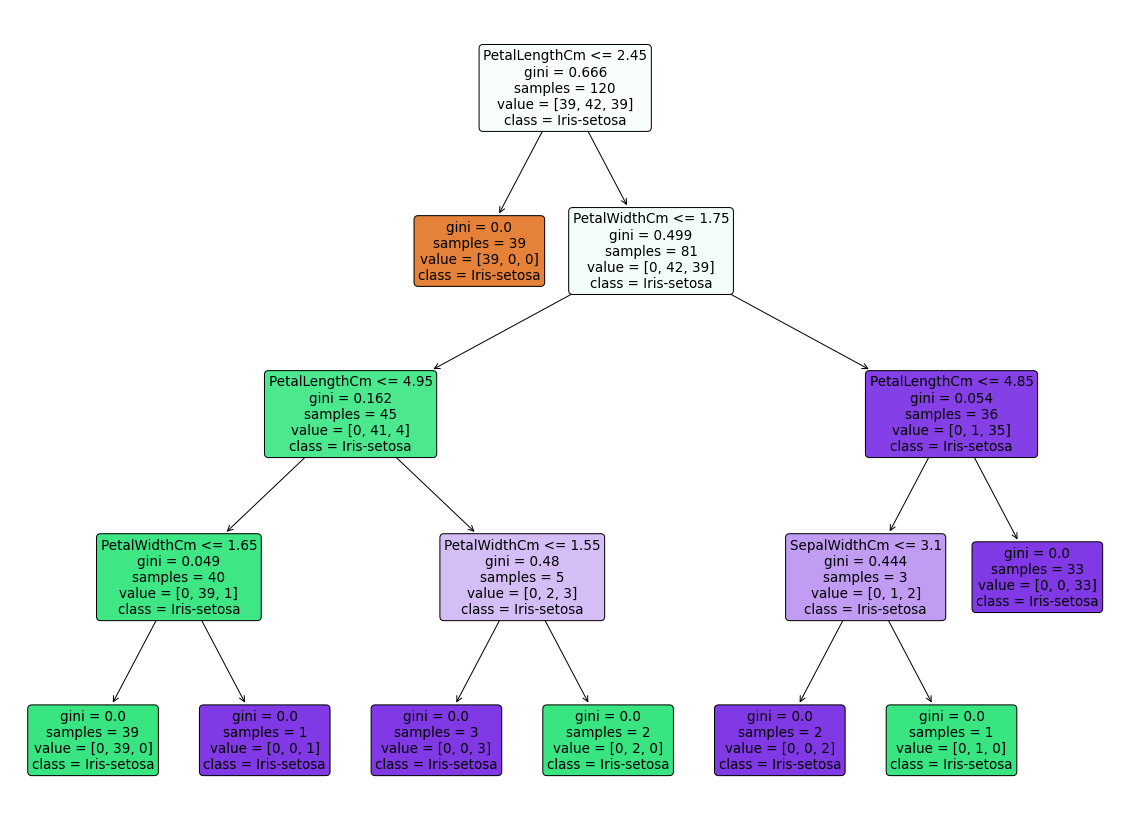

In [ ]:
#Visualizing the trained Decision Tree
fig_size = plt.figure(figsize=(20,15))
_ = plot_tree(
    tree_classifier,
    feature_names = iris_df.columns[:4],
    class_names = np.array(iris_df.Species),
    rounded = True,
    filled = True
)

PREDICTING USING CLASSIFIER ON NEW VALUES

In [ ]:
#Creating a new feature vector
X_new = [[5, 1.5, 1.3, 0.2]]

In [ ]:
#Predicting the probabilites for this feature vector
tree_classifier.predict_proba(X_new)

array([[1., 0., 0.]])

In [ ]:
#Predicting the class of the feature vector
tree_classifier.predict(X_new)

array([0], dtype=int8)